<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 1

## Q1: Simulate aliasing of sinusoidal signals

For this problem you will simulate the phenomena of aliasing.  This will give you pracitice in making synthetic time series, subsetting data, and plotting your results.

**1** To start, make a time vector that goes from 0 to 120 s, with 10000 entries in it.  Then make a synthetic time series that has two close in frequency sine waves:

$$ x = A_1 \cos (\omega t) + A_2 \cos ((\omega_1+\delta \omega ) t) $$

where $\omega$ is the "carrier" frequency, and $\delta \omega << \omega$ is the difference in frequencies between the two waves.  For simplicty, you could make $A_1=A_2=1. [V]$.  Feel free to choose an interesting $\omega$.

<hr>

In [2]:
# You will almost always need to import these:  Make sure to run this cell!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
t = np.linspace(0.,120.,10000)
om = 2.*np.pi/3.
dom = om*0.1
x1 = np.cos(om*t)
x2 = np.cos((om+dom)*t)
x=x1+x2

**2** Now plot the two component waves and the full value of $x$ as a time series.  Preferably on the same axis.  Make sure to label your axes and include a legend<hr>

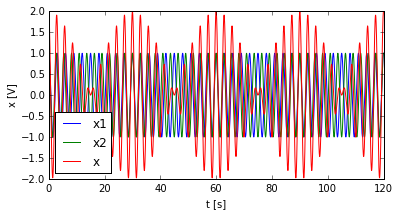

In [11]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(1,1,1)
ax.plot(t,x1,label='x1')
ax.plot(t,x2,label='x2')
ax.plot(t,x,label='x')
ax.legend(loc=0)
ax.set_xlabel('t [s]')
ax.set_ylabel('x [V]')


**3** Try a few different values of $\delta\omega$, and compare.<hr>

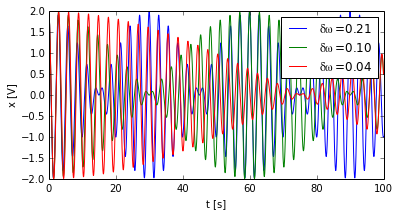

In [31]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(1,1,1)
for dom in (om*np.array([0.1,0.05,0.02])):
    x1 = np.cos(om*t)
    x2 = np.cos((om+dom)*t)
    x=x1+x2
    ax.plot(t,x,label='$\delta\omega = %1.2f$'%dom)
ax.legend(loc=0)
ax.set_xlabel('t [s]')
ax.set_ylabel('x [V]')

**4** Now, just so this works, let me specify some numbers for you.  Make $\omega=\frac{2\pi}{3}$, and $\delta\omega=\omega/10.$.  Plot the original time series, and a subsampled time series that just consists of every 200th point.  In a "Markdown" box below the code (or as a comment) describe the difference in these two signals as quantifiably as you can.  <hr>

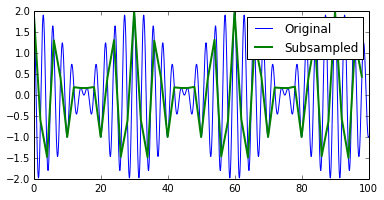

In [47]:
t = np.linspace(0.,100.,10000)
om = 2.*np.pi/3.
dom = om*0.1
x1 = np.cos(om*t)
x2 = np.cos((om+dom)*t)
x=x1+x2

tnew = t[::200]
xnew=x[::200]
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(1,1,1)
ax.plot(t,x,label='Original')
ax.plot(tnew,xnew,linewidth=2,label='Subsampled')
ax.legend()
ax.set_xlabel('t [s]')
ax.set_ylabel('x [V]')

Note that the subsampled signal has similar envelope and amplitudes to the original signal.  However, it has a much *lower* fundamental frequency.  Because the sampling is inadequate to capture the high frequency information, it gets projected onto a lower frequency.  As we will see, these two time series have the same variance, so that variance had to be projected somewhere that the new time series can "see" it.

## Q2: Demonstrate the central limit theorem for a very unfair coin flip.

Consider a coin that is twice as likely to come up heads as tails. To put a number on it, call tails $x=-1/2$ and heads $x=+1/2$.  

**1** What are the mean, $\mu_x$, and variance $\sigma_x^2$ of this process?

<hr>

We note that $p(x) = \frac{1}{3}\delta(-\frac{1}{2})+\frac{2}{3}\delta(+\frac{1}{2})$

The mean is just $\mu_x=\mathrm{E}(x) = -\frac{1}{6}+\frac{2}{6} = \frac{1}{6}$.  

The variance is $\sigma_x^2=\mathrm{E}\left[(x-\mu_x)^2\right] =  \frac{1}{3}(-\frac{1}{2}-\frac{1}{6})^2 + \frac{2}{3}(\frac{1}{2}-\frac{1}{6})^2 =0.22 $.  

In [4]:
p = np.array([1./3.,2./3.])
x=np.array([-1./2.,1./2.])
mean = np.sum(p*x)
print mean
thevar = np.sum(p*(x-mean)**2)
print thevar

0.166666666667
0.222222222222


**2** Plot or represent the *probability distribution*  (or cumulative distrubution) of this process.
<hr>

(0.0, 1.1)

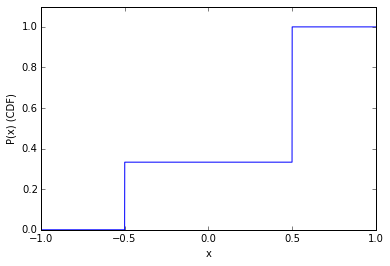

In [5]:
import numpy as np
x = np.linspace(-1.,1.,10000.)
P = 0.*x
P[x>-1./2.]=1./3.
P[x>1./2.]=3./3.
fig,ax=plt.subplots(1,1)
ax.plot(x,P)
ax.set_xlabel('x');ax.set_ylabel('P(x) (CDF)')
ax.set_ylim([0.,1.1])


**3** Write a function using the `np.random.rand` function to simulate the coin flip.  It shoudl return $+1/2+$ twice as often as $-1/2$.  Demonstrate that your function works.
<hr>

In [7]:
def expt(Nexpts,Nflips):
    xx = np.random.rand(Nexpts,Nflips)
    inhead = xx>=1./3.
    xn = xx*0.-1./2.
    xn[inhead]=1./2.
    return xn

xn = expt(2000000,1)

ind = np.where(xn>0.2)[0]
len12=len(ind)
print len12
ind = np.where(xn<0.2)[0]
print len(ind)
print (len12/2.-len(ind))/len(ind)


1333054
666946
-0.000628236768794


**4** Perform $N_{flip}$ and take the sample mean $\overline{x}$ of the values.  Do this 2000 times, and show that as $N_{flip}\to\infty$ the distribution of $\overline{x}$ approaches a Normal distribution by plotting the histograms of the means for each.  For $N_{flip}$ choose 2, 16, 64, 256. 

Comment on how the convergence of $\overline{x}$ for the unfair coin compares to the convergence of the sample mean of the dice roll from the notes.  
<hr>

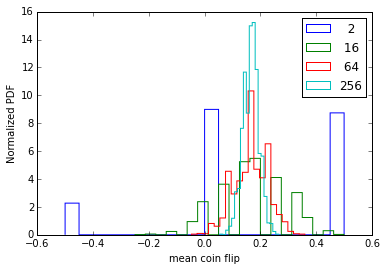

In [8]:
fig,ax=plt.subplots(1,1)
nroll=[2,16,64,256]
Nexpt=2000
for n,Nrolls in enumerate(nroll):
    xn = expt(Nexpt,Nrolls)
    means = np.mean(xn,axis=1)
    ax.hist(means,20,normed=True,histtype='step',label=('%3d'%Nrolls))
ax.set_xlabel('mean coin flip')
ax.set_ylabel('Normalized PDF')
ax.legend()


The convergence is slower, largely because the underlying distribution is very gappy and skewed positive.  i.e. it looks less Normal than the dice rolls did.

<hr>
**5** Replot the histograms, removing the mean and normalizing by the standard deviation.  Also show the CDF for normal distribution with mean zero and standard deviation of 1.
<hr>

(0.0, 1.1)

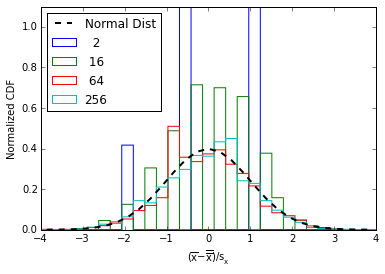

In [13]:
import scipy.stats as stats

fig,ax=plt.subplots(1,1)
nroll=[2,16,64,256]
Nexpt=2000
bins=np.linspace(-4.,4.,30)
midbins=bins[:-1]+np.diff(bins)/2.
for n,Nrolls in enumerate(nroll):
    xn = expt(Nexpt,Nrolls)
    means = np.mean(xn,axis=1)
    ax.hist((means-np.mean(means))/np.std(means),bins,normed=True,histtype='step',
            label=('%3d'%Nrolls),cumulative=False)
y = stats.norm.pdf(midbins, 0, 1.)
ax.plot(midbins,y,'k--',label='Normal Dist',linewidth=2)
ax.set_xlabel('$(\overline{x}-\overline{\overline{x}})/s_x$')
ax.set_ylabel('Normalized CDF')
ax.legend(loc=2)
ax.set_ylim([0.,1.1])


Note that histograms are not that good for comparing because even when normalized the values can be far larger than the pdf of interest.  I think its easier to consider a cumulative histogram versus the CDF:

(0.0, 1.1)

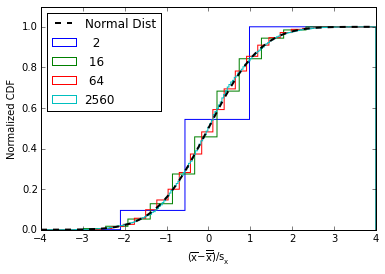

In [16]:
import scipy.stats as stats

fig,ax=plt.subplots(1,1)
nroll=[2,16,64,2560]
Nexpt=2000
bins=np.linspace(-4.,4.,3000)
midbins=bins[:-1]+np.diff(bins)/2.
for n,Nrolls in enumerate(nroll):
    xn = expt(Nexpt,Nrolls)
    means = np.mean(xn,axis=1)
    ax.hist((means-np.mean(means))/np.std(means),bins,normed=True,histtype='step',
            label=('%3d'%Nrolls),cumulative=True)
y = stats.norm.cdf(midbins, 0, 1.)
ax.plot(midbins,y,'k--',label='Normal Dist',linewidth=2)
ax.set_xlabel('$(\overline{x}-\overline{\overline{x}})/s_x$')
ax.set_ylabel('Normalized CDF')
ax.legend(loc=2)
ax.set_ylim([0.,1.1])


## Q3: Look at the Deep Cove weather data: 

There are two data sets, one with a sample every minute at 

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt`.

Download it locally, or use `genfromtxt` with the url as an argument.

The second is hourly data of the same station and a lot more.

`http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt`


In [172]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[6,2:]


**1** Compare the normalized histograms of the two time series.  Also calculate the means and the standard deviations.
<hr>

10.3387280591
10.3016961717
6.06772257867
5.98530478686


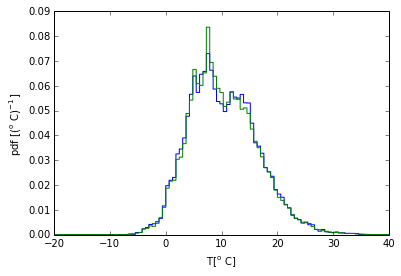

In [179]:
bins = np.linspace(-20.,40.,100)
fig,ax=plt.subplots(1,1)
ax.hist(hourdata,bins,normed=True,histtype='step')
ax.hist(minutedata,bins,normed=True,histtype='step')
ax.set_xlabel('$T [^oC]$');ax.set_ylabel('pdf $[(^oC)^{-1}]$');
print np.nanmean(hourdata)
print np.nanmean(minutedata)
print np.nanstd(hourdata)
print np.nanstd(minutedata)

**2** Comment on the shape of these histograms.  Are they Normal?  Speculate as to why they have this shape.
<hr>

There are two peaks, one at about 9 degrees and one at about 13.  These likely represent seasonal changes

<hr>
**3** Redo the histogram and the statistics with just the temperature at 3 PM (both time series start at midnight local time).
<hr>

13.2200563554
13.1277794034
6.72423407189
6.57159473341


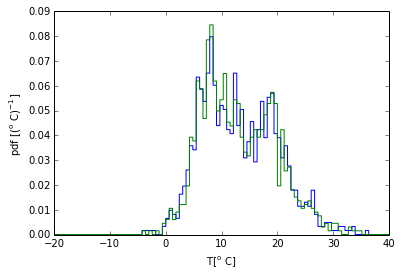

In [180]:

bins = np.linspace(-20.,40.,100)
fig,ax=plt.subplots(1,1)
ax.hist(hourdata[15::24],bins,normed=True,histtype='step')
ax.hist(minutedata[15*60::24*60],bins,normed=True,histtype='step')
ax.set_xlabel('$T [^oC]$');ax.set_ylabel('pdf $[(^oC)^{-1}]$');
print np.nanmean(hourdata[15::24])
print np.nanmean(minutedata[15*60::24*60])
print np.nanstd(hourdata[15::24])
print np.nanstd(minutedata[15*60::24*60])

**4** Redo the histogram and the statistics with just the temperature at 5 AM (both time series start at midnight local time).

7.94269411541
8.00691969785
4.63240283974
4.52813043505


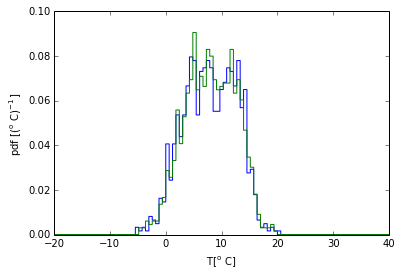

In [181]:

bins = np.linspace(-20.,40.,100)
fig,ax=plt.subplots(1,1)
ax.hist(hourdata[5::24],bins,normed=True,histtype='step')
ax.hist(minutedata[5*60::24*60],bins,normed=True,histtype='step')
ax.set_xlabel('$T [^oC]$');ax.set_ylabel('pdf $[(^oC)^{-1}]$');
print np.nanmean(hourdata[5::24])
print np.nanmean(minutedata[5*60::24*60])
print np.nanstd(hourdata[5::24])
print np.nanstd(minutedata[5*60::24*60])